In [8]:
import pandas as pd
import numpy as np
import sklearn
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
from nltk.corpus import stopwords

In [3]:
messages = pd.read_csv('/content/SMSSpamCollection',sep='\t',names=['labels','message'])

In [4]:
messages

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
Ps = PorterStemmer()
LT  = WordNetLemmatizer()
corpus=[]

In [25]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Lemmatization**

In [26]:
for i in range(0,len(messages)):
  word = re.sub('[^a-zA-z]',' ',messages['message'][i])
  word = word.lower()
  word = word.split()
  word = [LT.lemmatize(w) for w in word if not w in set(stopwords.words('english'))]
  word = ' '.join(word)
  corpus.append(word)

In [27]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
model = CountVectorizer(max_features=5000)

In [45]:
X= model.fit_transform(corpus).toarray()

In [46]:
X.shape

(5572, 5000)

In [48]:
y= pd.get_dummies(messages['labels'])

In [49]:
y= y.iloc[:,1].values

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
model = MultinomialNB()

In [56]:
spam_detection = model.fit(X_train,y_train)

In [57]:
y_pred = spam_detection.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [59]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

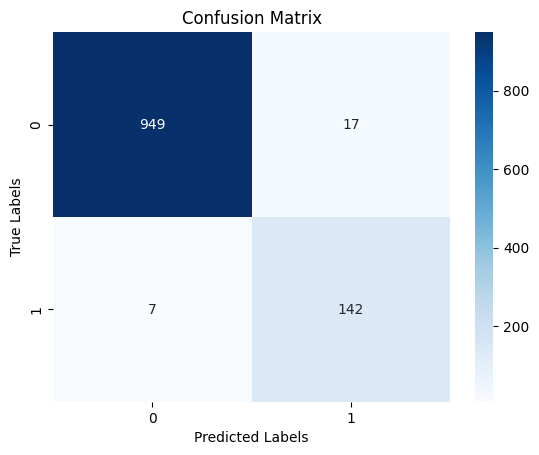

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

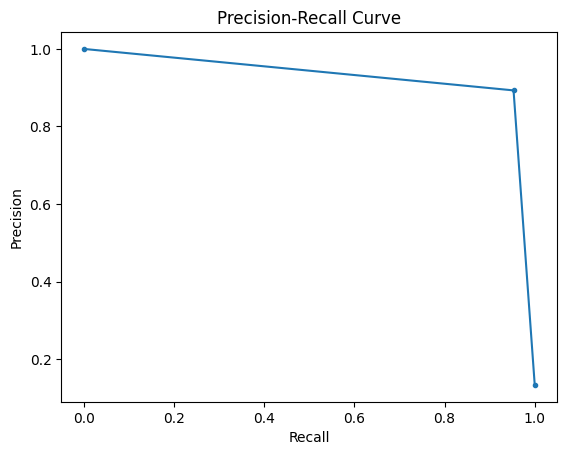

In [65]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.98
Precision: 0.89
Recall: 0.95
F1 Score: 0.92
